In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
from sklearn.svm import LinearSVC

digits = load_digits()
X, y = digits.data, digits.target%2
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
svm = LinearSVC(random_state=42).fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [5]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["even","odd"]))

             precision    recall  f1-score   support

       even       0.82      0.97      0.89       219
        odd       0.96      0.80      0.87       231

avg / total       0.89      0.88      0.88       450



In [14]:
#defualt threshold is 0
decision_function = svm.decision_function(X_test)
y_pred_2 = decision_function>-2
print(classification_report(y_test, y_pred_2, target_names=["even","odd"]))

             precision    recall  f1-score   support

       even       0.97      0.46      0.62       219
        odd       0.66      0.99      0.79       231

avg / total       0.81      0.73      0.71       450



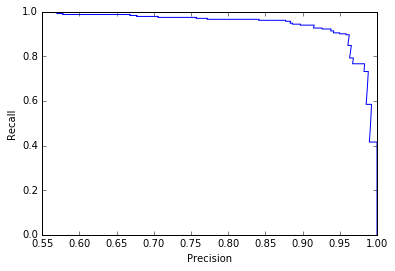

In [15]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, decision_function)
plt.plot(precision, recall)
plt.xlabel("Precision")
plt.ylabel("Recall")

In [17]:
## Receiver Operating Characteristics (ROC) Curve

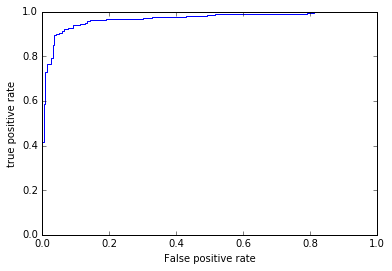

In [19]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, decision_function)
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False positive rate")
plt.ylabel("true positive rate")

In [20]:
## Area under the ROC curve for imbalanced classes

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC

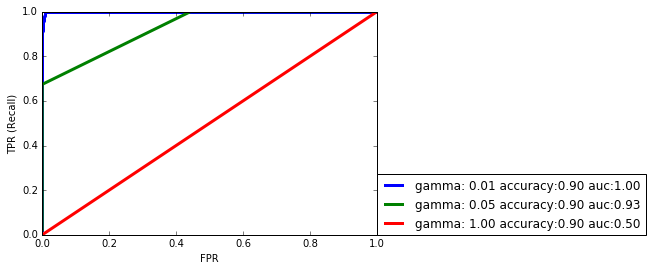

In [24]:
X , y = digits.data, digits.target==3
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)

for gamma in [0.01,0.05,1]:
    plt.xlabel("FPR")
    plt.ylabel("TPR (Recall)")
    svm = SVC(gamma=gamma).fit(X_train, y_train)
    decision_function = svm.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, decision_function)
    acc = svm.score(X_test, y_test)
    auc = roc_auc_score(y_test, svm.decision_function(X_test))
    plt.plot(fpr,tpr,label="gamma: %.2f accuracy:%.2f auc:%.2f" %(gamma, acc, auc), linewidth=3)
plt.legend(loc=(1,0))